



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Epoch 1/100





 - 0s - loss: 2.9086 - mean_absolute_error: 1.3332
Epoch 2/100
 - 0s - loss: 1.2780 - mean_absolute_error: 0.9149
Epoch 3/100
 - 0s - loss: 1.0884 - mean_absolute_error: 0.8393
Epoch 4/100
 - 0s - loss: 0.9762 - mean_absolute_error: 0.7973
Epoch 5/100
 - 0s - loss: 0.9064 - mean_absolute_error: 0.7642
Epoch 6/100
 - 0s - loss: 0.8627 - mean_absolute_error: 0.7436
Epoch 7/100
 - 0s - loss: 0.8211 - mean_absolute_error: 0.7264
Epoch 8/100
 - 0s - loss: 0.7841 - mean_absolute_error: 0.7071
Epoch 9/100
 - 0s - loss: 0.7568 - mean_absolute_error: 0.6924
Epoch 10/100
 - 0s - loss: 0.7341 - mean_absolute_error: 0.6796
Epoch 11/100
 - 0s - loss: 0.7104 - mean_absolute_error: 0.6667
Epoch 12/100
 - 0s - loss: 0.6992 - mean_absolute_error: 0.6611
Epoch 13/100
 - 0s - loss: 0.6763 - mean_absolute_error: 0.6489
Epoch 14/100
 - 0s - loss: 0.6742 - mean_absolute

Epoch 80/100
 - 0s - loss: 0.3614 - mean_absolute_error: 0.4393
Epoch 81/100
 - 0s - loss: 0.3607 - mean_absolute_error: 0.4408
Epoch 82/100
 - 0s - loss: 0.3533 - mean_absolute_error: 0.4340
Epoch 83/100
 - 0s - loss: 0.3600 - mean_absolute_error: 0.4392
Epoch 84/100
 - 0s - loss: 0.3608 - mean_absolute_error: 0.4383
Epoch 85/100
 - 0s - loss: 0.3520 - mean_absolute_error: 0.4341
Epoch 86/100
 - 0s - loss: 0.3464 - mean_absolute_error: 0.4286
Epoch 87/100
 - 0s - loss: 0.3539 - mean_absolute_error: 0.4324
Epoch 88/100
 - 0s - loss: 0.3450 - mean_absolute_error: 0.4295
Epoch 89/100
 - 0s - loss: 0.3490 - mean_absolute_error: 0.4304
Epoch 90/100
 - 0s - loss: 0.3460 - mean_absolute_error: 0.4293
Epoch 91/100
 - 0s - loss: 0.3419 - mean_absolute_error: 0.4235
Epoch 92/100
 - 0s - loss: 0.3364 - mean_absolute_error: 0.4220
Epoch 93/100
 - 0s - loss: 0.3392 - mean_absolute_error: 0.4210
Epoch 94/100
 - 0s - loss: 0.3333 - mean_absolute_error: 0.4186
Epoch 95/100
 - 0s - loss: 0.3288 - mean

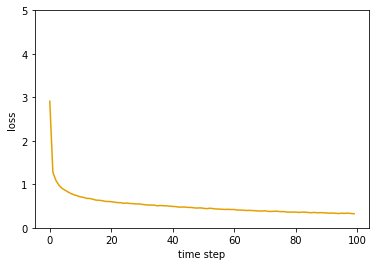

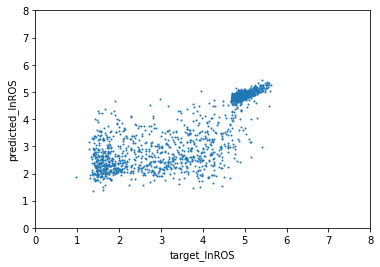

KERAS RMSE: 0.76


'\n#data_new = pd.read_csv("drug_351_basui_R.csv",sep=",",header=0)\nx_new = pd.read_csv(name2 + ".csv",sep=",",header=0)\n#x_new = pd.DataFrame(data_new.drop("NScode",axis=1))\n\n#DataFrameの形式になおして処理を行う\nx = pd.DataFrame(x_new.drop("lnROS",axis=1))\n#x_new2 = pd.DataFrame(x_new.drop("lnROS",axis=1))\n#x = pd.DataFrame(x_new2.drop("quality",axis=1))\ny_new =pd.DataFrame(x_new["lnROS"])\nprint(x)\n# standardization of x\nx = scaler.transform(x)\nprint(x)\n# result\ny_new_pred = model.predict(x, verbose=0)\n\nmse = mean_squared_error(y_new,y_new_pred)\nprint("mse:")\nprint(mse)\n\n# y_new and y_new_pred graph\ny_new = np.array(y_new)\n\n####実行結果出力\ndata2 = np.c_[y_new, y_new_pred]\ndata2 = pd.DataFrame(data2)\nnp.savetxt(\'out_\' + name2 + \'.csv\', data2, delimiter=\',\')\n\n#plt.xlabel(\'number\')\n#plt.ylabel(\'lnROS\')\nplt.xlabel(\'new_target_lnROS\')\nplt.ylabel(\'new_predicted_lnROS\')\nplt.xlim(0,8)\nplt.ylim(0,8)\n#x_int = np.arange(0,45,1)\n#plt.plot(x_int,y_test)\n#plt.plot(x_

In [2]:
##*********************************************************
#      ROS quantity prediction (Keras+theano)  ver.6      *
#        copyright Masayuki Kogoshi                       * 
#                & Sumio Kogoshi, All right reserved      *
##*********************************************************
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import random

##SMOTE用　start
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
##SMOTE用　end

savefile = "teiROS_all.h5"
name = "teiROS_all"
name2 = "T87_teiROS_tuika"
# load of data
data_set = pd.read_csv(name + ".csv",sep=",",header=0)

random.seed(40)

#separation of input(x) and target(y)
x1 = pd.DataFrame(data_set.drop("quality",axis=1))


##########SMOTE処理　START
#評価値を抜き出し
yQ = pd.DataFrame(data_set["quality"])
#SMOTE定義
sm = SMOTE(random_state=42)

#qualityの少数データ数を多数の方に合わせる
X_res, Y_res = sm.fit_sample(x1, yQ["quality"])

#検証用　生成結果をCSVに吐き出し
np.savetxt('data_' + name + 'gousei.csv', X_res, delimiter=',')

#DataFrameの形式になおして処理を行う
x = pd.DataFrame(X_res.drop("lnROS",axis=1))
y=pd.DataFrame(X_res["lnROS"])
#SMOTE END

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

# standardization of x
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)


# input and output for keras
x_train = x_train.astype(np.float)

X = x_train
y = y_train

# number,dimensio,class_number
(n_samples, n_features) = X.shape
#n_classes = len(np.unique(y))

# to keras format
#y_keras = keras.utils.to_categorical(y, n_classes)

# 4 layers
model = Sequential()
# input layer
model.add(Dense(units=128, activation='relu', input_shape=(n_features,)))
# Dropout
model.add(Dropout(0.1))
# second layer
model.add(Dense(units=64, activation='relu'))
# Dropout
model.add(Dropout(0.1))

# second layer
model.add(Dense(units=32, activation='relu'))
# Dropout
model.add(Dropout(0.1))

# output layer
model.add(Dense(1))
model.summary

# compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
#model.compile(loss='mean_squared_error', optimizer='AdaGrad', metrics=['mae'])
#model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['mae'])

# learning
history = model.fit(X, y, epochs=100, batch_size=128, verbose=2)

# save model
model.save_weights(savefile)

#loss_graph
plt.xlabel('time step')
plt.ylabel('loss')
plt.ylim(0,5)
loss, = plt.plot(history.history['loss'], c='#E69F00')
plt.show()

x_test = scaler.transform(x_test)
# result
y_pred = model.predict(x_test, verbose=0)

mse = mean_squared_error(y_test,y_pred)

#print("test_target")
#print(y_test)
#print("test_predicted")
#print(y_pred)

# y_test and y_pred graph
y_test = np.array(y_test)

####実行結果出力
data1 = np.c_[y_test, y_pred]
data1 = pd.DataFrame(data1)
np.savetxt('out_' + name + '.csv', data1, delimiter=',')

plt.xlabel('target_lnROS')
plt.ylabel('predicted_lnROS')
plt.xlim(0,8)
plt.ylim(0,8)
#x_int = np.arange(0,45,1)
#plt.plot(x_int,y_test)
#plt.plot(x_int,y_pred)
plt.scatter(y_test,y_pred,s=1)
plt.show()

print("KERAS RMSE: %.2f" %(mse**0.5))

# load of new data
#data_new = pd.read_csv("drug_351_basui_R_q0_300.csv",sep=",",header=0)
#data_new = pd.read_csv("drug_351_basui_R_q2_30.csv",sep=",",header=0)


# In[27]:

'''
#data_new = pd.read_csv("drug_351_basui_R.csv",sep=",",header=0)
x_new = pd.read_csv(name2 + ".csv",sep=",",header=0)
#x_new = pd.DataFrame(data_new.drop("NScode",axis=1))

#DataFrameの形式になおして処理を行う
x = pd.DataFrame(x_new.drop("lnROS",axis=1))
#x_new2 = pd.DataFrame(x_new.drop("lnROS",axis=1))
#x = pd.DataFrame(x_new2.drop("quality",axis=1))
y_new =pd.DataFrame(x_new["lnROS"])
print(x)
# standardization of x
x = scaler.transform(x)
print(x)
# result
y_new_pred = model.predict(x, verbose=0)

mse = mean_squared_error(y_new,y_new_pred)
print("mse:")
print(mse)

# y_new and y_new_pred graph
y_new = np.array(y_new)

####実行結果出力
data2 = np.c_[y_new, y_new_pred]
data2 = pd.DataFrame(data2)
np.savetxt('out_' + name2 + '.csv', data2, delimiter=',')

#plt.xlabel('number')
#plt.ylabel('lnROS')
plt.xlabel('new_target_lnROS')
plt.ylabel('new_predicted_lnROS')
plt.xlim(0,8)
plt.ylim(0,8)
#x_int = np.arange(0,45,1)
#plt.plot(x_int,y_test)
#plt.plot(x_int,y_pred)
plt.scatter(y_new,y_new_pred,s=1)
plt.show()


# In[ ]:
'''